In [28]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv('covid_clean_lags.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# df = df[df['date'].dt.year < 2024]

df = df.set_index('date')
df.index = pd.to_datetime(df.index)

# df2 = df.copy()

#df = df[(df['location'] == 'Egypt') | (df['location'] == 'Denmark') | (df['location'] == 'Brazil')]

df = df.pivot(columns='location', values='new_cases')
df.fillna(0, inplace=True)
# df2 = df2.pivot(columns='location', values='new_cases')
df['total_new_cases'] = df.sum(axis=1)
#df = df[['new_cases']]

#df = df.groupby('date')['new_cases'].sum()

df

location,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe,total_new_cases
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2020-01-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
2020-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1896.0
2020-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,12538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-17,336.0,49.0,0.0,0.0,0.0,45.0,0.0,0.0,598.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,377395.0
2023-12-24,372.0,41.0,0.0,0.0,0.0,372.0,0.0,0.0,575.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,339944.0
2023-12-31,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,542.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,141079.0


In [55]:
df['day_of_week'] = df['date'].dt.day_name()

# Group by day of the week and sum the new cases
daily_cases = df.groupby('day_of_week')['new_cases'].sum()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_cases = daily_cases.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
daily_cases.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total New Cases')
plt.title('Total New Cases for Each Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'date'

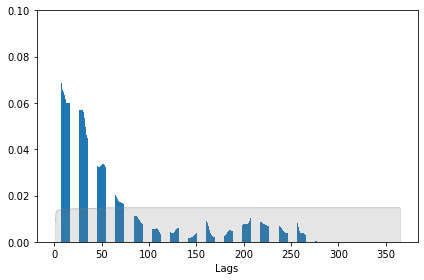

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, acf
acf_values, confint = acf(df['new_cases'], alpha=0.05,nlags=365)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='grey', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)

plt.ylim(0, 0.1)
plt.xlabel('Lags')
plt.tight_layout()

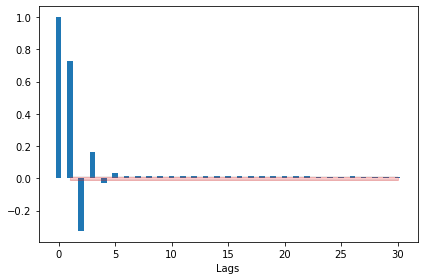

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, pacf
acf_values, confint = pacf(df['new_cases'], alpha=0.05,nlags=30)
lags = np.arange(0, len(acf_values))

lower_bound = confint[1:, 0] - acf_values[1:]
upper_bound = confint[1:, 1] - acf_values[1:]

plt.bar(lags, acf_values, width=0.5, align='center', label='ACF')
plt.fill_between(lags[1:], lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')
plt.plot(lags[1:], upper_bound, color='grey', lw=0.3)
plt.plot(lags[1:], lower_bound, color='grey', lw=0.3)
plt.xlabel('Lags')
plt.tight_layout()

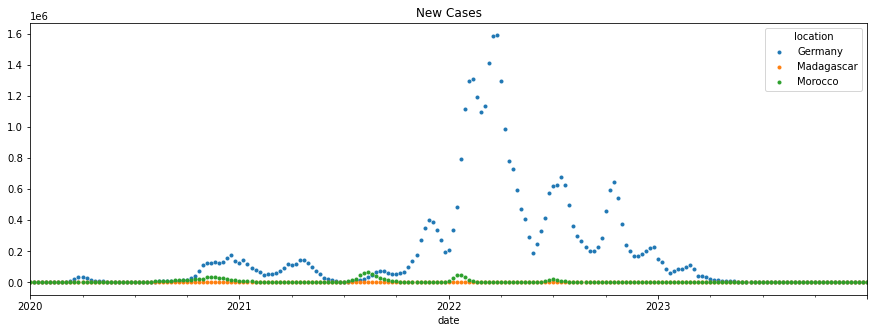

In [19]:
df.plot(style='.',
        figsize=(15, 5),
        title='New Cases')
plt.show()

In [33]:
df[['Germany']]

location,Germany
date,
2020-01-05,1.0
2020-01-12,0.0
2020-01-19,0.0
2020-01-26,1.0
2020-02-02,9.0
...,...
2023-12-17,0.0
2023-12-24,0.0
2023-12-31,0.0


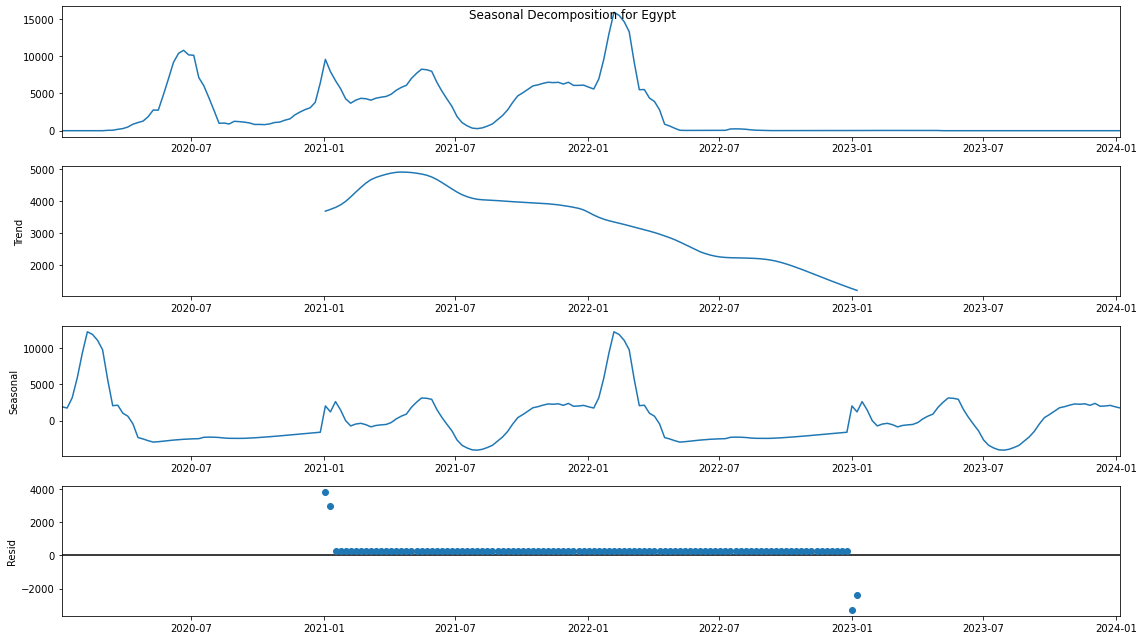

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = seasonal_decompose(df[['Egypt']], period=104).plot()

fig.set_size_inches((16, 9))
fig.tight_layout()

plt.suptitle('Seasonal Decomposition for Egypt')

plt.show()

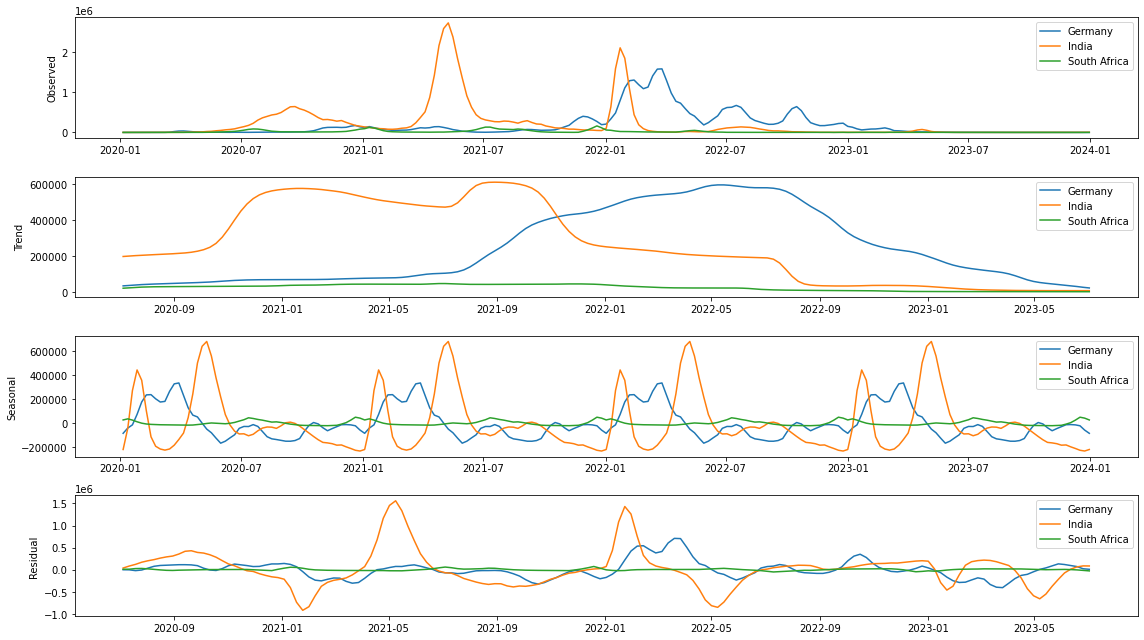

In [98]:
columns_to_decompose = ['Germany', 'India', 'South Africa']

fig, axes = plt.subplots(4, 1, figsize=(16, 9))

for column in columns_to_decompose:
    result = seasonal_decompose(df[column], period=52)
    
    axes[0].plot(result.observed, label=column)
    axes[1].plot(result.trend, label=column)
    axes[2].plot(result.seasonal, label=column)
    axes[3].plot(result.resid, label=column)

axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')
axes[3].legend(loc='upper right')

axes[0].set_ylabel('Observed')
axes[1].set_ylabel('Trend')
axes[2].set_ylabel('Seasonal')
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [84]:
from statsmodels.tsa.stattools import adfuller

X = df2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ValueError: x is required to have ndim 1 but has ndim 2